# ML7_11 Assignment from Sessions 27_32

### 2.1. Problem Statement: Machine Learning 7

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.

Download 'nba_2013.csv' file from this link:

https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:

player - name of the player

pos - the position of the player

g - number of games the player was in

gs - number of games the player started

pts - total points the player scored

There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:



In [1]:
# importing necessary libraries

import pandas as pd
#with open("nba_2013.csv", 'r') as csvfile:
nba = pd.read_csv("nba_2013.csv")

import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [3]:
nba.shape

(481, 31)

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

There are 4 categorical data columns: player, pos, bref_team_id & season

In [5]:
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

Will drop column which are not use-ful to us like season, season_end, player, their team id

In [14]:
nba_new = nba.copy()

In [15]:
nba_new.drop('player',axis=1,inplace=True)
nba_new.drop('bref_team_id',axis=1,inplace=True)
nba_new.drop('season',axis=1,inplace=True)
#nba_new.drop('season_end',axis=1,inplace=True)

In [16]:
nba.shape,nba_new.shape

((481, 31), (481, 28))

In [5]:
nba_new['pos'].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

In [17]:
# One hot-encoding for imp categorical data
pos = pd.get_dummies(nba_new['pos'],prefix='pos',drop_first=True)
pos.head()

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [18]:
# Drop pos column from data & add new encoded to the data
nba_new.drop('pos',axis=1,inplace=True)
nba_new = pd.concat([nba_new, pos], axis=1)

In [12]:
nba.shape, nba_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 32 columns):
age       481 non-null int64
g         481 non-null int64
gs        481 non-null int64
mp        481 non-null int64
fg        481 non-null int64
fga       481 non-null int64
fg.       479 non-null float64
x3p       481 non-null int64
x3pa      481 non-null int64
x3p.      414 non-null float64
x2p       481 non-null int64
x2pa      481 non-null int64
x2p.      478 non-null float64
efg.      479 non-null float64
ft        481 non-null int64
fta       481 non-null int64
ft.       461 non-null float64
orb       481 non-null int64
drb       481 non-null int64
trb       481 non-null int64
ast       481 non-null int64
stl       481 non-null int64
blk       481 non-null int64
tov       481 non-null int64
pf        481 non-null int64
pts       481 non-null int64
pos_F     481 non-null uint8
pos_G     481 non-null uint8
pos_PF    481 non-null uint8
pos_PG    481 non-null uint8
pos_SF    481 n

((481, 31), None)

In [19]:
nba_new.isna().sum()

age            0
g              0
gs             0
mp             0
fg             0
fga            0
fg.            2
x3p            0
x3pa           0
x3p.          67
x2p            0
x2pa           0
x2p.           3
efg.           2
ft             0
fta            0
ft.           20
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pf             0
pts            0
season_end     0
pos_F          0
pos_G          0
pos_PF         0
pos_PG         0
pos_SF         0
pos_SG         0
dtype: int64

In [20]:
#Fill na values with median from values
nba_new.fillna(0,inplace=True)

In [ ]:
#Fill na values with median from values
nba_new['fg.'].fillna(nba_new['fg.'].median(),inplace=True)
nba_new['x3p.'].fillna(nba_new['x3p.'].median(),inplace=True)
nba_new['x2p.'].fillna(nba_new['x2p.'].median(),inplace=True)
nba_new['efg.'].fillna(nba_new['efg.'].median(),inplace=True)
nba_new['ft.'].fillna(nba_new['ft.'].median(),inplace=True)

In [21]:
nba_new.isna().sum()

age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg.           0
x3p           0
x3pa          0
x3p.          0
x2p           0
x2pa          0
x2p.          0
efg.          0
ft            0
fta           0
ft.           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
season_end    0
pos_F         0
pos_G         0
pos_PF        0
pos_PG        0
pos_SF        0
pos_SG        0
dtype: int64

In [106]:
nba_new.shape

(481, 32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7180c4b00>,
      dtype=object)

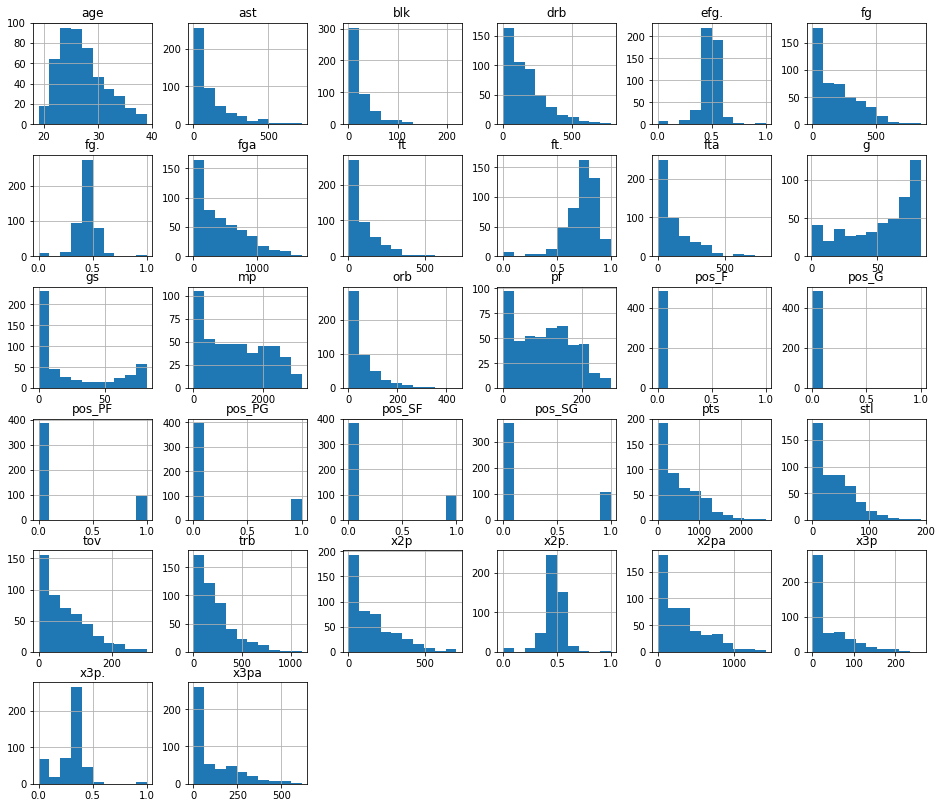

In [105]:
nba_new.hist(figsize=(16,14))

In [22]:
# Assign Y
y = nba_new['pts']
y = y.ravel()

In [23]:
#Assign X
x = nba_new.drop(['pts'], axis=1)
x.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,season_end,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,2013,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.000000,...,57,71,203,2013,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.000000,...,36,39,108,2013,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,2013,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,2013,0,0,0,0,0,0


In [43]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
 x, y, train_size=0.7, test_size=0.3,random_state =100) #train_size=0.8, test_size=0.2,

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
for K in range(21):
    K_value = K+1
    knn = KNeighborsRegressor(n_neighbors=K_value)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print("Score is ", knn.score(X_test, y_test),"for K-Value:",K_value)#np.sqrt
#    print(knn.score(X_test, y_test))

Score is  0.9001580266254151 for K-Value: 1
Score is  0.9338008176947172 for K-Value: 2
Score is  0.9373326824956051 for K-Value: 3
Score is  0.9434679075242551 for K-Value: 4
Score is  0.9438740363546291 for K-Value: 5
Score is  0.9440663861227285 for K-Value: 6
Score is  0.9428030190991243 for K-Value: 7
Score is  0.9356166112368723 for K-Value: 8
Score is  0.9332546786900139 for K-Value: 9
Score is  0.9304128050712787 for K-Value: 10
Score is  0.9259167687362015 for K-Value: 11
Score is  0.9235613417689319 for K-Value: 12
Score is  0.9209801291163454 for K-Value: 13
Score is  0.9199125839315554 for K-Value: 14
Score is  0.9225091741752767 for K-Value: 15
Score is  0.9222194880071862 for K-Value: 16
Score is  0.92209616563399 for K-Value: 17
Score is  0.9217542998508516 for K-Value: 18
Score is  0.9195427503559472 for K-Value: 19
Score is  0.9180604005885531 for K-Value: 20
Score is  0.9158828934219889 for K-Value: 21


#### Highest score is 0.9440 at K-value of 6

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

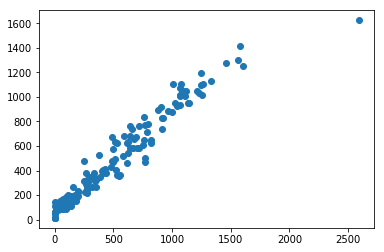

In [55]:
plt.scatter(y_test,pred)
plt.show()

#### We can check with GridsearchCV too for best 'n_neighbour' value

In [56]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=8)
#fit model to data
knn_gscv.fit(x, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}

In [58]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9755349108658763

### 2.2. Problem Statement: Machine Learning 8-Text Analysis

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.

Hint:

from bs4 import BeautifulSoup

import urllib.request

import nltk

response = urllib.request.urlopen('http://php.net/')

html = response.read()

soup = BeautifulSoup(html,"html5lib")


In [83]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
response = urllib.request.urlopen('http://php.net/')

In [84]:
%matplotlib inline

In [85]:
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [86]:
print(soup)

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="https://www.php.net/index.php" rel="canonical"/>
 <link href="https://www.php.net/index" rel="shorturl"/>
 <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<

In [ ]:
nltk.download('punkt')

In [87]:
tokens = nltk.word_tokenize(raw)
tokens[:10]

['PHP',
 ':',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting']

In [106]:
text = nltk.Text(tokens)
text1 = text.concordance('Preprocessor')
text1

Displaying 1 of 1 matches:
 Preprocessor Downloads Documentation Get Invol


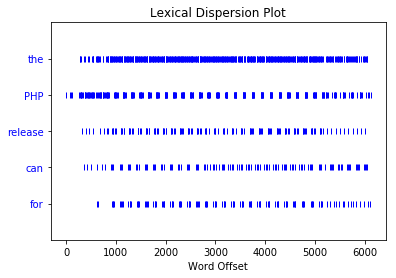

In [107]:
text.dispersion_plot(["the", "PHP", "release", "can", "for"])

In [100]:
#Finding word freaquencies on webpage
counts = nltk.FreqDist(nltk.word_tokenize(soup.text))

In [109]:
# Print word frequency
print(counts)
counts

<FreqDist with 536 samples and 6129 outcomes>


FreqDist({'the': 403, '.': 341, 'PHP': 277, 'of': 147, ',': 146, 'in': 140, 'release': 137, 'for': 117, 'can': 114, 'The': 109, ...})

### 2.3. Problem Statement: Machine Learning 9-Clustering

In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference. The raw image is available in spicy.misc package with the name face.

Hint:

import numpy as np

from sklearn import cluster, datasets

from scipy import misc

In [1]:
# First import neccessary libraries
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import face
from skimage.measure import compare_ssim as ssim

In [3]:
from sklearn.cluster import KMeans

In [4]:
faceGray = face(gray=True)

In [5]:
faceGray[5]

array([122, 126, 128, ..., 119, 115, 113], dtype=uint8)

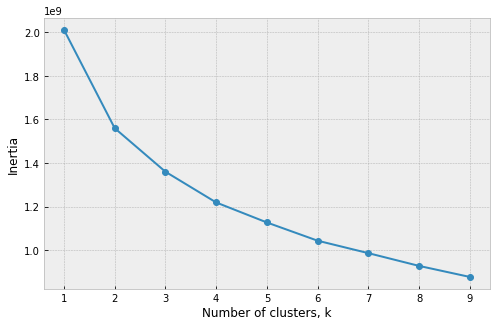

In [6]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(faceGray)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### Use K-Means Clustering

In [7]:
n_clusters = 5
np.random.seed(0)

X = faceGray.reshape((-1, 1))
kmeans = cluster.KMeans(n_clusters=n_clusters, n_init=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [9]:
def k_means(n_clust, data):
    k_means = cluster.KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data)
    c_labels = k_means.labels_
    #df = pd.DataFrame({'clust_label': c_labels})
    #ct = pd.crosstab(df['clust_label'])
    y_clust = k_means.predict(data)
    #display(ct)
    print('% 9s' % 'inertia silhouette')
    print('%i    %.3f'
      %(k_means.inertia_,
      silhouette_score(data, y_clust, metric='euclidean')))

In [10]:
k_means(n_clust=5, data=faceGray)

inertia silhouette
1126315379    0.224


In [11]:
print(k_means)

<function k_means at 0x7f0ff0af5488>


In [12]:
# Values & label from clustering
values = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_

In [13]:
faceGray.min(),faceGray.max()

(0, 250)

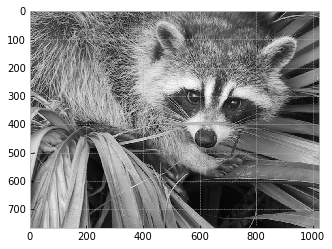

In [14]:
# Image Original
plt.imshow(faceGray, cmap=plt.cm.gray)

In [15]:
# create an array from labels and values
faceGray_comp = np.choose(labels, values)
faceGray_comp.shape = faceGray.shape


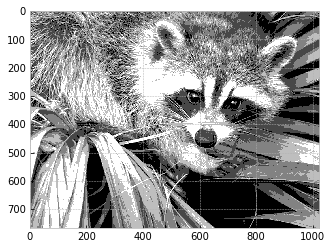

In [16]:
# compressed face
#plt.figure(2, figsize=(3, 2.2))
plt.imshow(faceGray_comp, cmap=plt.cm.gray)

Check similarity between two impages using function "compare_images"

Used mean squared error(MSE) and structural similarity(SSIM) to check similarity between two images MSE equal to 0 and SSIM equals to 1 means two images are similar to each other, otherwise not.


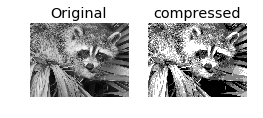

In [17]:
# load the images -- original and compressed
original = faceGray
compressed = faceGray_comp

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("compressed", compressed)

# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")

In [18]:
def mse(imageA, imageB):
    # 'Mean Squared Error', NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar" the two images are
    return err

def compare_images(imageA, imageB, title):
    # compute the MSE and structural similarity index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA.astype('float'), imageB.astype('float'))

    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

MSE and SSIM between same image : 


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


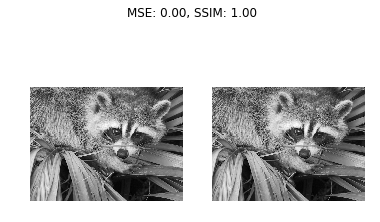

In [19]:
# Compare the Original images
print("MSE and SSIM between same image : ")
compare_images(original, original, "Original vs. Original")

MSE and SSIM between original and compressend images : 


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


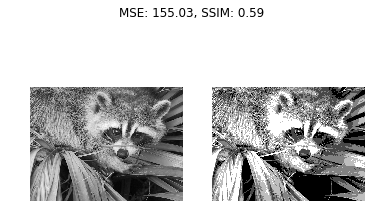

In [20]:
# Compare the Original & compresse images
print("MSE and SSIM between original and compressend images : ")
compare_images(original, compressed, "Original vs. compressed")

### 2.4. Problem Statement: Machine Learning 10-PCA

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

Hint:

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

### Load iris data from datasets

In [17]:
iris = datasets.load_iris()

In [19]:
iris.keys() #features of iris dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
#Assign X & Y from the data
X= iris.data
Y= iris.target
X[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Apply PCA

In [43]:
# import PCA library & plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
norm_x = StandardScaler().fit_transform(X)

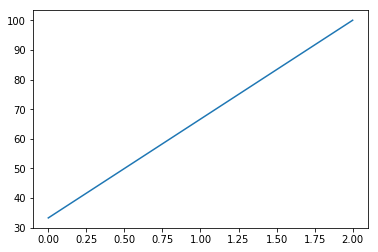

In [47]:
# Apply PCA & plot for no of componets' vs. accuracy achieved
pca = PCA(n_components=3)
pca.fit_transform(norm_x)

pca.explained_variance_ratio_.cumsum()
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(var, decimals=4)*100)
plt.plot(var1)

### With 2 features too we can achieve 100%

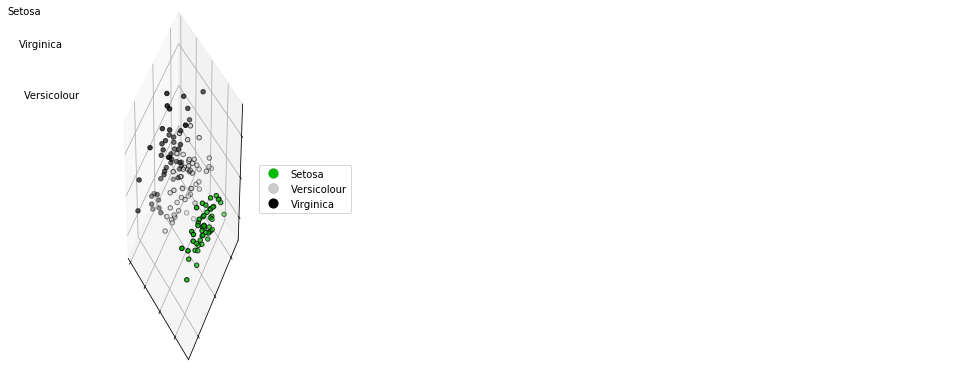

In [110]:
centers = [[1, 1], [-1, -1], [1, -1]]
# Data visualization
fig = plt.figure(1,figsize=(10, 20))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.2, 0.25], elev=48, azim=130)

labels= [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]
plt.cla()

# Make 3-D empty box
for name, label in labels:
    ax.text3D(X[Y == label, 0].mean()+3,
              X[Y == label, 1].mean() + 4.5,
              X[Y == label, 2].mean()+3, name,
              horizontalalignment='right',
              bbox=dict(alpha=1.0, edgecolor='w', facecolor='w'))
# Plot scatters points over
sc =ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Add color and legends
colors = [sc.cmap(sc.norm(i)) for i in [1, 2, 0]]
custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labels], 
          loc='center left', bbox_to_anchor=(1.0, .5))

plt.show()

### 2.5. Problem Statement: Machine Learning 11- Time series

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-threeyear-period#!ds=22r0&display=line

Hint:

Following is the command import packages and data 

from pandas import read_csv

from pandas import datetime

from matplotlib import pyplot

from statsmodels.tsa.arima_model

import ARIMA from sklearn.metrics

import mean_squared_error def

parser(x):

return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)

In [2]:
import pandas as pd
from pandas import datetime, DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error

import warnings
%matplotlib inline

In [3]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from scipy import stats

In [6]:
def parser(x):
    return datetime.strptime('1901'+x[2:8], '%Y-%m-%d')


In [7]:
series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)

In [9]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [11]:
from pandas.plotting import autocorrelation_plot

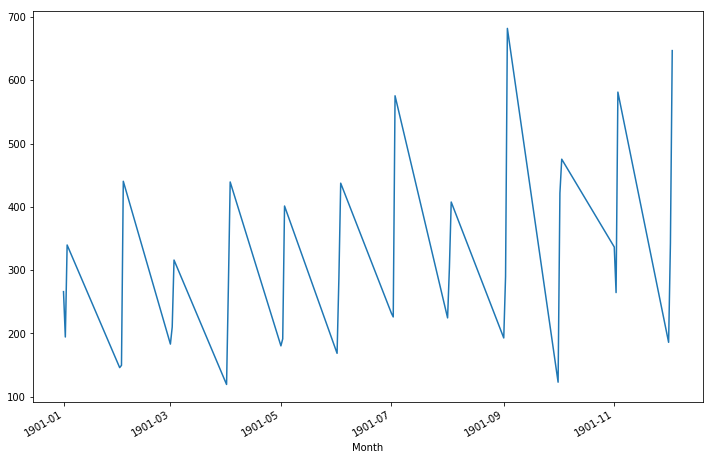

In [12]:
# show plots in the notebook
%matplotlib inline
series.plot(figsize=(12,8));

### Auto-correlations

In [16]:
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

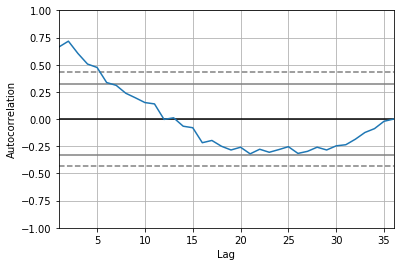

In [21]:
# show plots in the notebook
%matplotlib inline
#fig = plt.figure(figsize=(12,8))
autocorrelation_plot(series)

### Times Series Modeling

In [20]:
arma_mod20 = sm.tsa.ARMA(series, (2,0)).fit()
print(arma_mod20.params)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an e

const                                              379.083906
ar.L1.Sales of shampoo over a three year period      0.261716
ar.L2.Sales of shampoo over a three year period      0.685838
dtype: float64


### Analyzing result

In [22]:
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=0.9979541649468857, pvalue=0.6071514079878657)

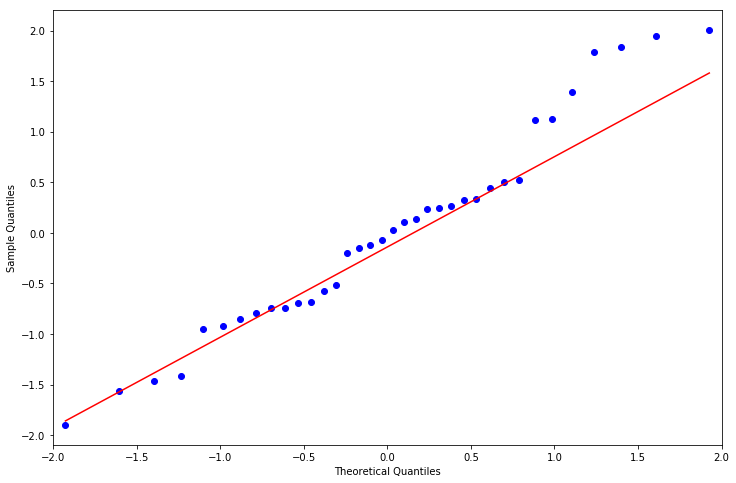

In [24]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

In [27]:
series.shape

(36,)

### Prediction

In [63]:
predict_shampoo20 = arma_mod20.predict() #'1901-01-01','1901-12-01'
print(predict_shampoo20)

Month
1901-01-01    379.083906
1901-02-01    284.878154
1901-03-01    240.498706
1901-04-01    167.865400
1901-05-01    176.681091
1901-06-01    148.889304
1901-07-01    187.637172
1901-08-01    196.110908
1901-09-01    237.613925
1901-10-01    224.310910
1901-11-01    184.275897
1901-12-01    192.238362
1901-01-02    299.318924
1901-02-02    198.230138
1901-03-02    192.266300
1901-04-02    177.400749
1901-05-02    235.502983
1901-06-02    257.413402
1901-07-02    226.263322
1901-08-02    275.864756
1901-09-02    254.337802
1901-10-02    303.973320
1901-11-02    329.045338
1901-12-02    378.254615
1901-01-03    290.870974
1901-02-03    343.548707
1901-03-03    368.120331
1901-04-03    404.600572
1901-05-03    351.509499
1901-06-03    426.196698
1901-07-03    409.582803
1901-08-03    470.484535
1901-09-03    521.256642
1901-10-03    477.919319
1901-11-03    612.016562
1901-12-03    497.995748
dtype: float64


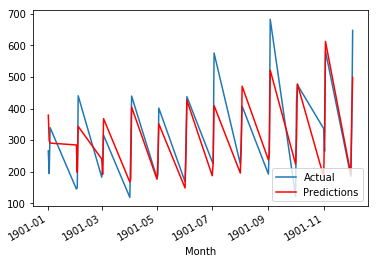

In [65]:
#plot Actual vs predicted sales data
series.plot(label='Actual')
predict_shampoo20.plot(color='red', label='Predictions')
pyplot.legend(loc=4)

In [68]:
import numpy as np

In [69]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [70]:
print("MFE = ", mean_forecast_err(series, predict_shampoo20))
print("MAE = ", mean_absolute_err(series, predict_shampoo20))

MFE =  9.209506293567248
MAE =  0.03469294794025415


#### For MFE > 0, models tends to under-forecast. The measure of MAE being small would indicate a pretty good fit.

## Thank you!!!